In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner import RandomSearch

In [2]:
mnist_data = keras.datasets.mnist

(X_train_val, y_train_val), (X_test, y_test) = mnist_data.load_data()

print('X_train_val:', X_train_val.shape)
print('y_train_val:', y_train_val.shape)

X_train, X_val = X_train_val[5000:] / 255.0, X_train_val[:5000] / 255.0

y_train, y_val = y_train_val[5000:], y_train_val[:5000]

X_test = X_test / 255.0

print('X_train:', X_train.shape)
print('X_val:', X_val.shape)
print('X_test:', X_test.shape)

X_train_val: (60000, 28, 28)
y_train_val: (60000,)
X_train: (55000, 28, 28)
X_val: (5000, 28, 28)
X_test: (10000, 28, 28)


### Model 1 ###

In [3]:
model_1 = Sequential()
model_1.add(Input(shape=(28, 28)))
model_1.add(Flatten())
model_1.add(Dense(300, activation='relu'))
model_1.add(keras.layers.Dropout(0.5))
model_1.add(Dense(100, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

I0000 00:00:1770386219.351955 2772306 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5860 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [5]:
early_stopping_monitor = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
model_1_trained = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping_monitor])

Epoch 1/50
 173/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.4835 - loss: 1.4995

I0000 00:00:1770386225.416482 2772609 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8835 - loss: 0.3751 - val_accuracy: 0.9636 - val_loss: 0.1309
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9415 - loss: 0.1980 - val_accuracy: 0.9696 - val_loss: 0.1099
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9504 - loss: 0.1649 - val_accuracy: 0.9716 - val_loss: 0.0955
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9560 - loss: 0.1458 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9601 - loss: 0.1308 - val_accuracy: 0.9778 - val_loss: 0.0808
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9639 - loss: 0.1196 - val_accuracy: 0.9760 - val_loss: 0.0824
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1127 - val_accuracy: 0.9786 - val_loss: 0.0754
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9680 - loss: 0.1051 - val_accura

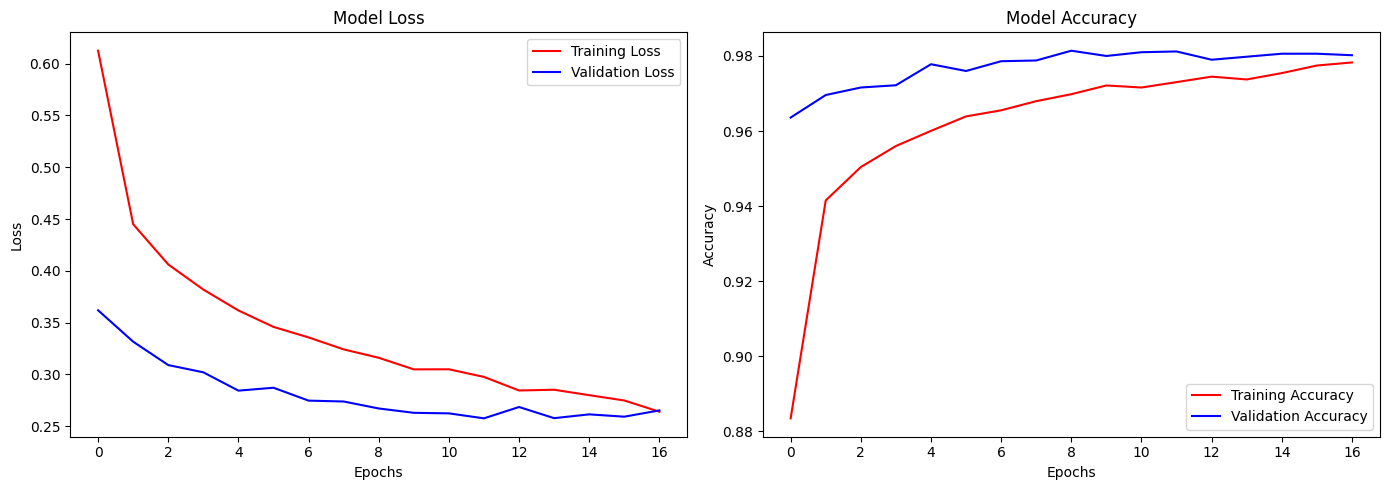

In [6]:
# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss
ax1.plot(np.sqrt(model_1_trained.history['loss']), 'r', label='Training Loss')
ax1.plot(np.sqrt(model_1_trained.history['val_loss']), 'b', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss')
ax1.legend()

# Plot 2: Accuracy
ax2.plot(model_1_trained.history['accuracy'], 'r', label='Training Accuracy')
ax2.plot(model_1_trained.history['val_accuracy'], 'b', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [7]:
model_1.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9787 - loss: 0.0731


[0.07307790219783783, 0.9786999821662903]

In [8]:
predictions_1 = model_1.predict(X_test)
predicted_classes_1 = predictions_1.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


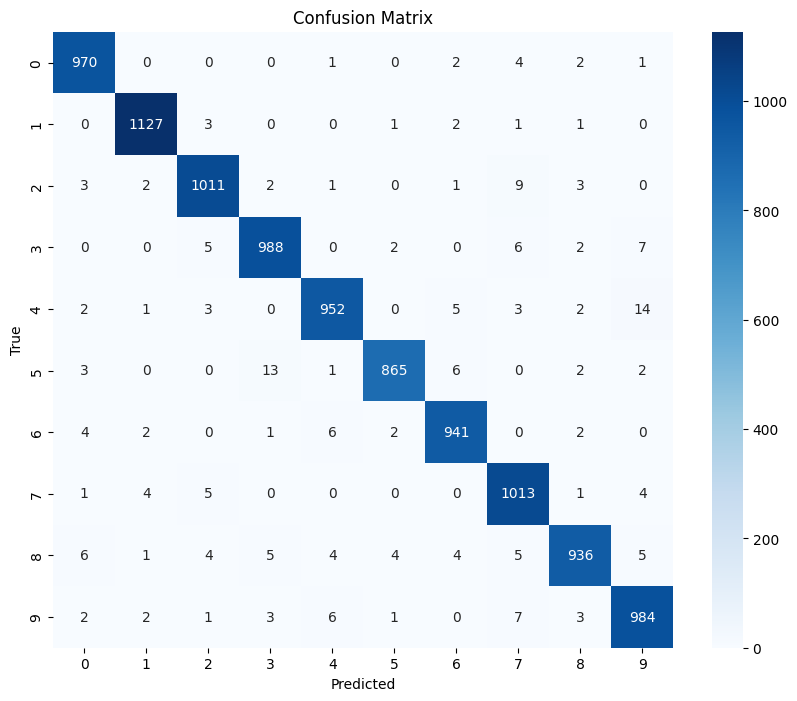

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes_1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 5. Classification report
print(classification_report(y_test, predicted_classes_1))

### Model 2 (Keras Tuner) ###

In [10]:
from keras.layers import Activation, BatchNormalization

# Defining the tuner and it's structure 
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28)))
    model.add(Flatten())
    hp_units_1 = hp.Int('units_1', min_value=28, max_value=300, step=20)
    model.add(Dense(units=hp_units_1))

    if hp.Boolean('batch_norm_1'):
        model.add(BatchNormalization())

    model.add(Activation('relu'))

    if hp.Boolean('dropout_1'):
        hp_dropout_rate = hp.Choice('dropout_rate_1', values=[i * 0.05 for i in range(12)])
        model.add(Dropout(rate=hp_dropout_rate))

    hp_units_2 = hp.Int('units_2', min_value=28, max_value=220, step=10)
    model.add(Dense(units=hp_units_2))

    if hp.Boolean('batch_norm_2'):
        model.add(BatchNormalization())

    model.add(Activation('relu'))

    if hp.Boolean('dropout_2'):
        hp_dropout_rate = hp.Choice('dropout_rate_2', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
        model.add(Dropout(rate=hp_dropout_rate))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f"units_{i+3}", min_value=10,
            max_value=150, step=5)))
        
        if hp.Boolean(f'batch_norm_{i+3}'):
            model.add(BatchNormalization())
        
        model.add(Activation('relu'))
        
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [11]:
# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    overwrite=True
)

# Running the search
tuner.search(X_train, y_train, 
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=20, 
    callbacks=[early_stopping_monitor], 
    verbose=2
)

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.973800003528595

Best val_accuracy So Far: 0.9801999926567078
Total elapsed time: 00h 02m 36s


In [12]:
# Getting and tuning the best model
tuned_model = tuner.get_best_models(num_models=2)[0]
tuned_model.build()

#Training with the best hyperparameters
model_history = tuned_model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=50, 
    callbacks=[early_stopping_monitor], 
    verbose=2
)

/home/celvin/Repos/School/ai-del-2/.venv/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/celvin/Repos/School/ai-del-2/.venv/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/50
1719/1719 - 13s - 7ms/step - accuracy: 0.9615 - loss: 0.1200 - val_accuracy: 0.9746 - val_loss: 0.0885
Epoch 2/50
1719/1719 - 2s - 1ms/step - accuracy: 0.9752 - loss: 0.0810 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 3/50
1719/1719 - 2s - 1ms/step - accuracy: 0.9789 - loss: 0.0656 - val_accuracy: 0.9786 - val_loss: 0.0780
Epoch 4/50
1719/1719 - 2s - 1ms/step - accuracy: 0.9823 - loss: 0.0553 - val_accuracy: 0.9790 - val_loss: 0.0747
Epoch 5/50
1719/1719 - 2s - 1ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9814 - val_loss: 0.0679


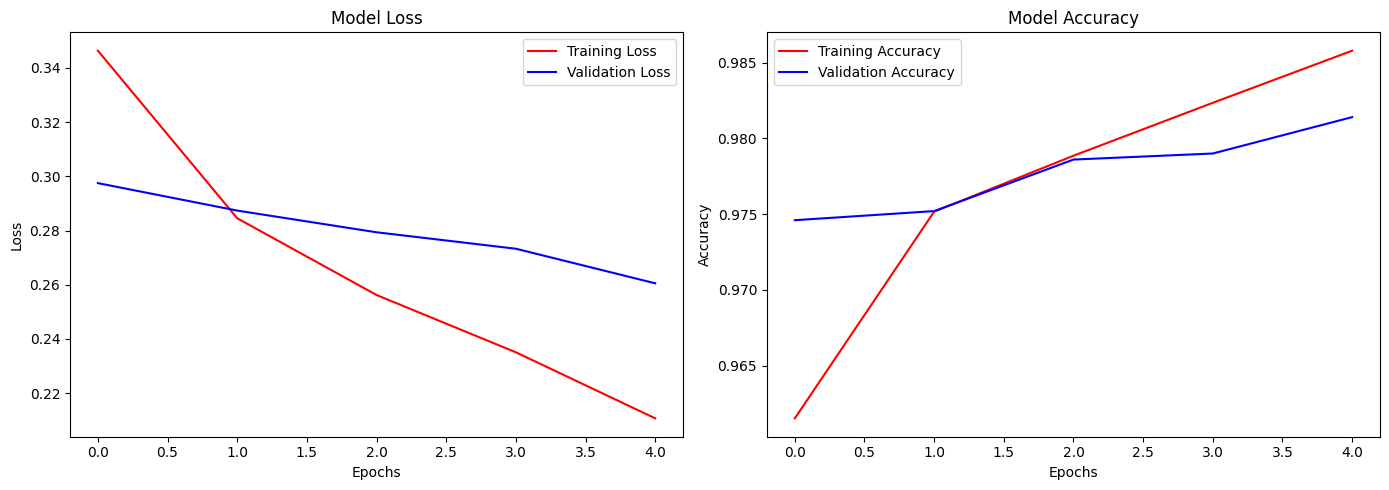

In [13]:
# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss
ax1.plot(np.sqrt(model_history.history['loss']), 'r', label='Training Loss')
ax1.plot(np.sqrt(model_history.history['val_loss']), 'b', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss')
ax1.legend()

# Plot 2: Accuracy
ax2.plot(model_history.history['accuracy'], 'r', label='Training Accuracy')
ax2.plot(model_history.history['val_accuracy'], 'b', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [14]:
tuned_model.evaluate(X_test, y_test, verbose=2)

predictions = tuned_model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

313/313 - 1s - 3ms/step - accuracy: 0.9722 - loss: 0.0912
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


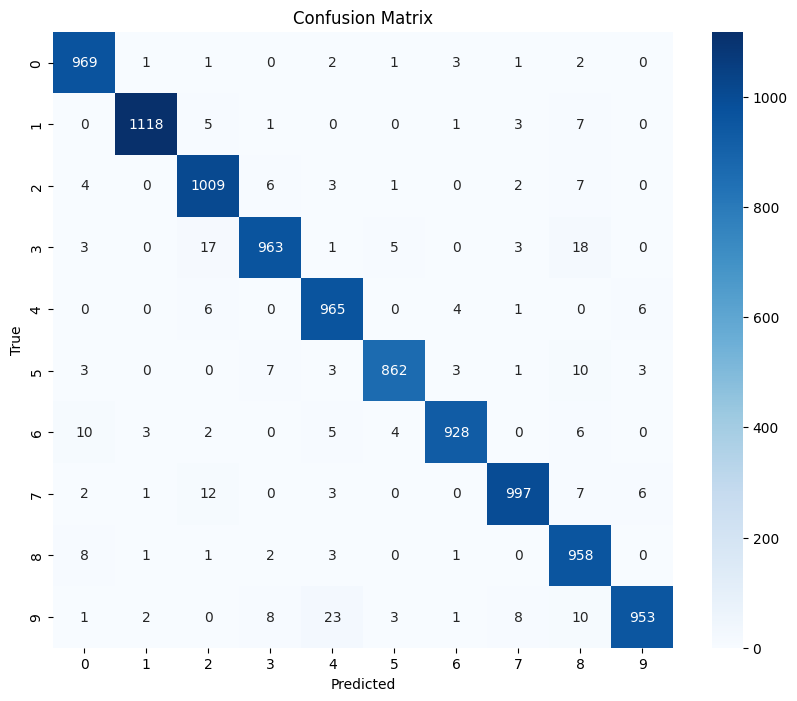

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.95      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.93      0.98      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 5. Classification report
print(classification_report(y_test, predicted_classes))